First of all, a few notes:
* Check the first homework for a quick reminder on general rules.
* Neural networks and boosting algorithms are complicated! Don't worry if you don't understand their implementation just now.

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

# Introduction

In this homework, you will apply classical and advanced ML models to a machine learning problem of your choice. That is, you are free to choose any data that you like, and that has something to do with biological or medical sciences.

Several ideas that you might find interesting:

*   Data from your current/past coursework project(s)
*   [Kaggle](https://www.kaggle.com/) competitions
*   Single-cell datasets, the target is to predict gene expression based on other genes
*   GEO datasets/data from scientific publications
*   ....


# Tasks [8.0]

* [1] Explain the nature of your problem/domain and do the EDA to get the initial understanding of the data.

I decided to take this [dataset](https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset). 

**Context**

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Data comes from an original (non-machine-learning) study:
Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994)
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait",


In [ ]:
! wget https://github.com/kseniakoshkina/data/raw/main/archive.zip

--2022-12-14 13:12:34--  https://github.com/kseniakoshkina/data/raw/main/archive.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kseniakoshkina/data/main/archive.zip [following]
--2022-12-14 13:12:34--  https://raw.githubusercontent.com/kseniakoshkina/data/main/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58677 (57K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  57.30K  --.-KB/s    in 0.01s   

2022-12-14 13:12:34 (5.14 MB/s) - ‘archive.zip’ saved [58677/58677]



In [ ]:
! unzip archive.zip

Archive:  archive.zip
  inflating: abalone.csv             


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("abalone.csv")

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<Figure size 720x720 with 0 Axes>

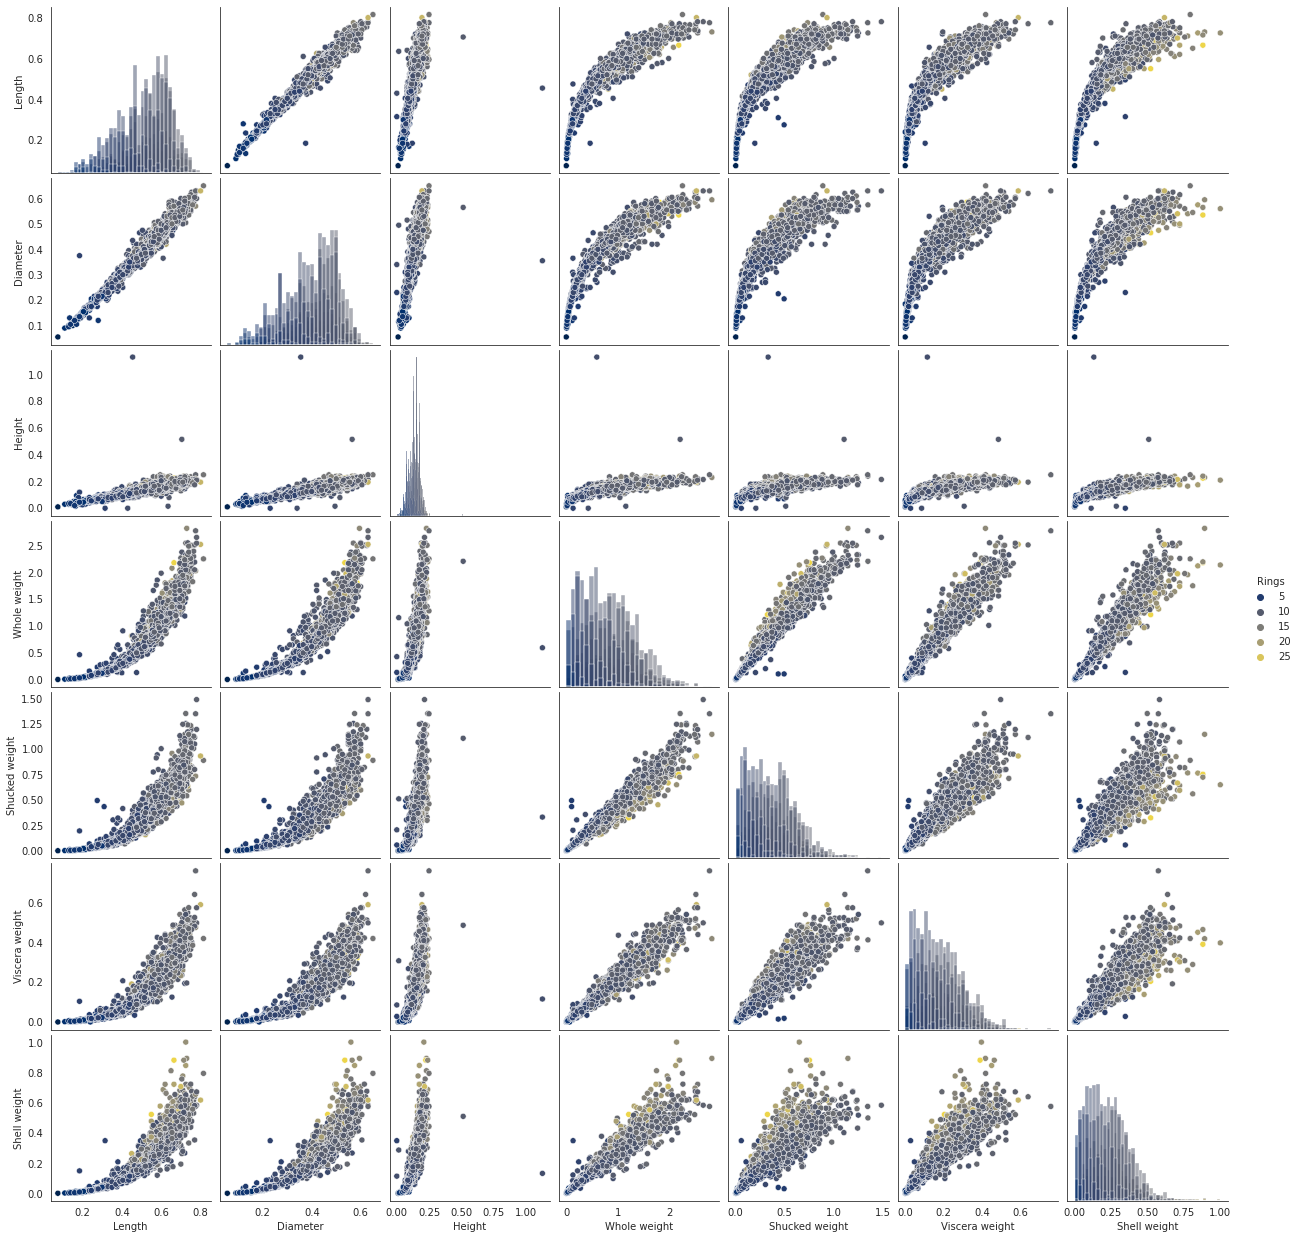

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             data,
             diag_kind='hist',
             corner=False,
             palette='cividis',
             hue='Rings'
            )

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


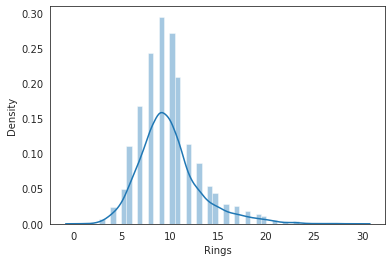

In [ ]:
sns.distplot(data['Rings'])

First of all, we need to convert "Rings" into "Age". It can be done with the formula below.

In [ ]:
data['Age'] = data['Rings']+1.5

In [ ]:
data = data.drop(['Rings'],axis=1)

Let's check correlation between all features.

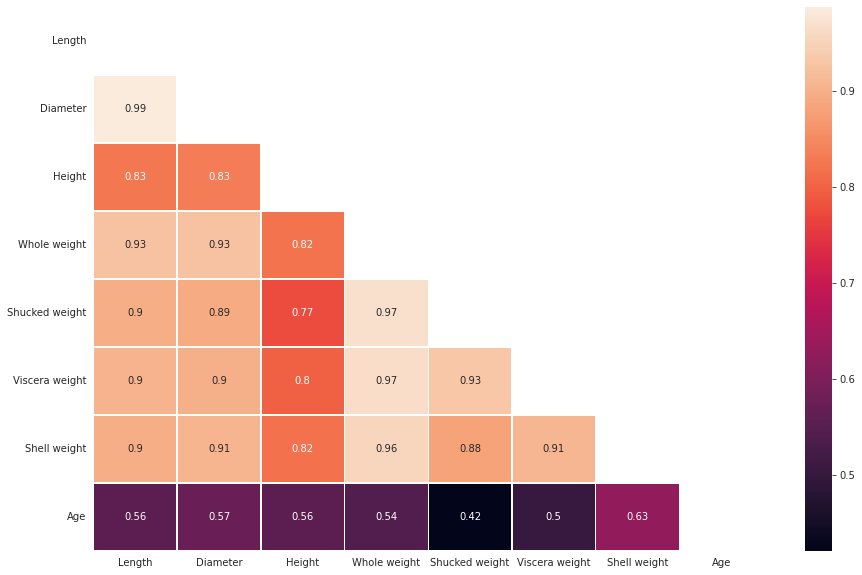

In [ ]:
#plot corr of each attrubites
f,ax= ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))


a=sns.heatmap (data.corr(), annot=True, mask=mask, linewidths=0.5)

We can see that some features have correlation with each other, but I think that's not the problem. The second step is to check the distribution of age. 

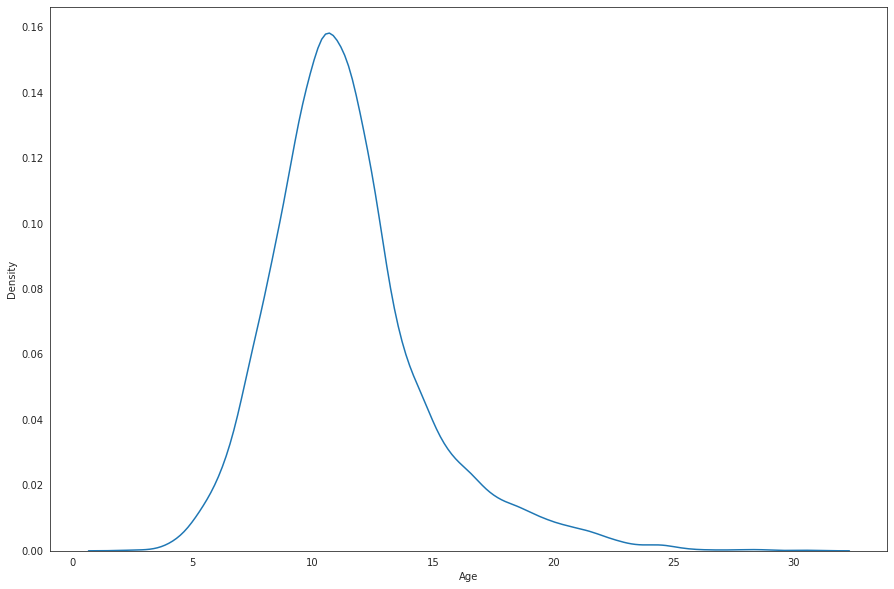

In [ ]:
fig_1, ax_1 = plt.subplots(figsize=(15, 10))
sns.kdeplot(data.Age, ax=ax_1)

In [ ]:
pd.DataFrame(data.Age.describe())

,Age
count,4177.000000
mean,11.433684
std,3.224169
min,2.500000
25%,9.500000
50%,10.500000
75%,12.500000
max,30.500000


We can see that most of the data is distributed from age 7 to age 15. The mininum value of age is 2.5. The maximum value of age is 30.5.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


I think we need to convert Sex into integer categories. M - 0, F - 1, I - 2.

In [ ]:
data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
dict_of_sex = {'M':0, 'F':1, 'I':2}

In [ ]:
data['Sex'] = data['Sex'].apply(lambda x: dict_of_sex[x])

In [ ]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


* [0.5] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

To choose the traget metric, we need to check outliers in our target data.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from sklearn.metrics import r2_score
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import neighbors
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.svm import LinearSVR
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = data.drop(columns=['Age'])

In [ ]:
y = data.Age

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

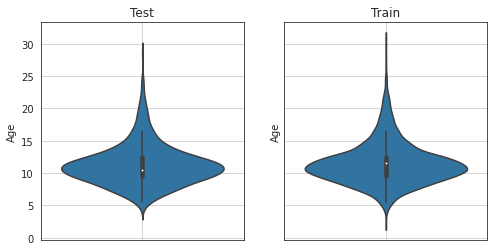

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

for ax, title, data in zip(axes, ["Test", "Train"], [y_test, y_train]):
  sns.violinplot(y=data, ax=ax)
  ax.grid()
  ax.set_title(title)

So, now we can train all our models.

We have some outliers; therefore, we will use mean absolute error (MAE) as both our target loss and the target metric.

In [ ]:
from sklearn.metrics import mean_absolute_error as metric

### ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
lmodel = {
    "alpha": np.linspace(0.1, 1, num=10),
    "l1_ratio": np.linspace(0.1, 1, num=10),
}

cv_elasticnet = GridSearchCV(ElasticNet(), lmodel, scoring="neg_mean_absolute_error", cv=3)
pred_elasticnet = cv_elasticnet.fit(X_train, y_train).predict(X_test)

print('Best parameters: ', cv_elasticnet.best_params_)

pred_elasticnet = cv_elasticnet.fit(X_train, y_train).predict(X_test)

print('MAE: ', metric(y_test, pred_elasticnet))
print('R2: ', r2_score(y_test, pred_elasticnet))

Best parameters:  {'alpha': 0.1, 'l1_ratio': 0.1}
MAE:  1.940599697320472
R2:  0.3071486460542999


### Decision Tree

In [ ]:
dtm = tree.DecisionTreeRegressor()

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [1, 1.5, 2, 5],
              "max_depth": [8, 16, 24, 32, 40],
              "min_samples_leaf": [1, 2],
              "max_leaf_nodes": [180, 200, 220, 240],
              }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=3, scoring='neg_mean_absolute_error')

grid_cv_dtm.fit(X_train, y_train)

print('Best score: ', grid_cv_dtm.best_score_)
print('Best params: ', grid_cv_dtm.best_params_)

preds_dt = grid_cv_dtm.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, preds_dt))
print('R2: ', r2_score(y_test, preds_dt))

Best score:  -1.6741880813389232
Best params:  {'criterion': 'mae', 'max_depth': 8, 'max_leaf_nodes': 240, 'min_samples_leaf': 2, 'min_samples_split': 2}
MAE:  1.5927033492822966
R2:  0.4141713954690791


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [10, 20]
}

grid_cv_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_absolute_error')

grid_cv_rf.fit(X_train, y_train)

print('Best score: ', grid_cv_rf.best_score_)
print('Best params: ', grid_cv_rf.best_params_)

preds_rf = grid_cv_rf.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, preds_rf))
print('R2: ', r2_score(y_test, preds_rf))

Best score:  -1.5460232921069579
Best params:  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 20}
MAE:  1.510928548666869
R2:  0.5568622875184586


### SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

grid = {'kernel':['rbf', 'poly']}

model = svm.SVR()

svm_cv = GridSearchCV(model, grid, cv=3, scoring='neg_mean_absolute_error') 
svm_cv.fit(X_train, y_train)

print('Best parameters: ', svm_cv.best_params_)
print('Best score: ', svm_cv.best_score_)

preds_svm = svm_cv.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, preds_svm))
print('R2: ', r2_score(y_test, preds_svm))

Best parameters:  {'kernel': 'rbf'}
Best score:  -1.5679733650246181
MAE:  1.5055386137097606
R2:  0.5167779754955809


* [1] Describe the general idea behind gradient boosting models. Use the sklearn [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) implementation to regress your target. Then, optimize the model hyperparameters using grid search. 

**Gradient boosting** is a technique attracting attention for its prediction speed and accuracy, especially with large and complex data. Machine learning models can be fitted to data individually, or combined in **an ensemble**. An ensemble is a combination of simple individual models that together create a more powerful new model.

**Machine learning boosting is a method for creating an ensemble.** It starts by fitting **an initial model** (e.g. a tree or linear regression) to the data. Then **a second model** is built that focuses on accurately predicting the cases where the first model performs poorly. **The combination of these two models is expected to be better than either model alone.** **Then you repeat this process of boosting many times.**  Each successive model attempts to correct for the shortcomings of the combined boosted ensemble of all previous models.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
clf = GradientBoostingRegressor().fit(X_train, y_train)
clf.fit(X_test, y_test)

ypred_gb = clf.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, ypred_gb))
print('R2: ', r2_score(y_test, ypred_gb))

MAE:  1.1044659883714514
R2:  0.7757863837207567


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grid = {
    "learning_rate": [0.001, 0.01, 0.1],
    "n_estimators": [50, 100, 150],
    "subsample": [0.5, 0.75],
    "max_depth": [3, 4, 5],
    "min_samples_leaf": [25, 30]
}

cv = GridSearchCV(GradientBoostingRegressor(),
                  grid, scoring="neg_mean_absolute_error", cv=3)

pred_gbgrid = cv.fit(X_train, y_train).predict(X_test)

print('Best parameters: ', cv.best_params_)
print('Best score: ', cv.best_score_)


print('MAE: ', mean_absolute_error(y_test, pred_gbgrid))
print('R2: ', r2_score(y_test, pred_gbgrid))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 30, 'n_estimators': 50, 'subsample': 0.75}
Best score:  -1.5339189342274147
MAE:  1.4659856692507065
R2:  0.5788612415535104


* [1] Explain what neural networks are and how they are trained. Use [PyTorch](https://pytorch.org/) to implement and train a simple fully-connected network. Then play around and find a "better" architecture for your problem than the original one (=limited manual grid search).

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. In this sense, neural networks refer to systems of neurons, either organic or artificial in nature.

Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria. 

Main things:
* Neural networks are a series of algorithms that mimic the operations of an animal brain to recognize relationships between vast amounts of data.
As such, they tend to resemble the connections of neurons and synapses found in the brain.
* Neural networks with several process layers are known as "deep" networks and are used for deep learning algorithms

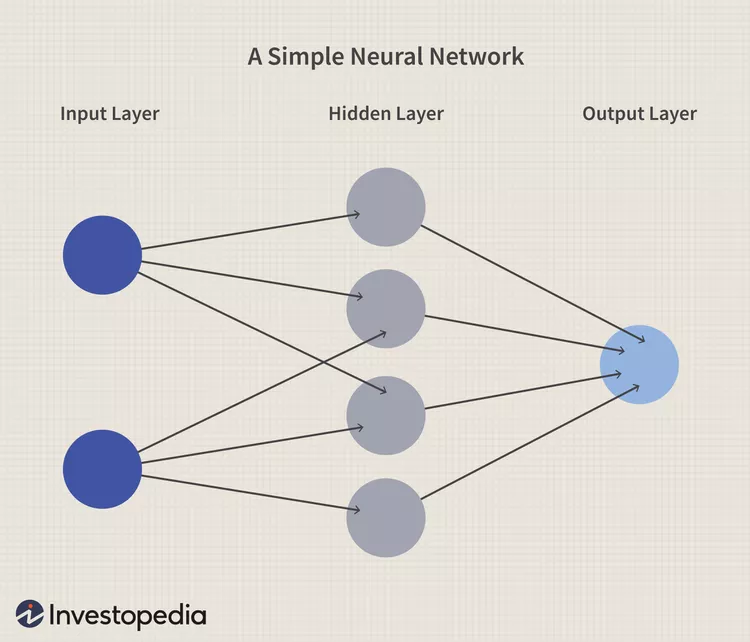

In [ ]:
import torch, torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import classification_report
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [ ]:
trainX, valX, trainY, valY = train_test_split(X_train, y_train, test_size=0.3)

In [ ]:
Xtrain, ytrain = torch.tensor(trainX.values, dtype=torch.float32), \
                 torch.tensor(trainY.values, dtype=torch.float32)

Xval, yval = torch.tensor(valX.values, dtype=torch.float32), \
             torch.tensor(valY.values, dtype=torch.float32)

Xtest, ytest = torch.tensor(X_test.values, dtype=torch.float32), \
               torch.tensor(y_test.values, dtype=torch.float32)

In [ ]:
def make_model():
  model = torch.nn.Sequential(
      # 1
      torch.nn.Linear(8, 6),     # Fully-connected layers
      # torch.nn.ReLU(),              # Activation function
      # 2
      torch.nn.Linear(6, 4),
      # torch.nn.ReLU(),
      # 3
      torch.nn.Linear(4, 2),
      # torch.nn.ReLU(),
      # 4
      torch.nn.Linear(2, 1),
      # No activation because our targets are not bounded!
  )
  return model

In [ ]:
from sklearn.metrics import mean_absolute_error as metric

In [ ]:
model = make_model()

In [ ]:
print("Validation:") # just for the nice output

# Learning rate
lr = 1e-3
for epoch in range(3_500): # when this value was more than 3000, the model started to overfit
  predY = model(Xtrain)

  loss = (predY - ytrain).abs().mean()

  # Zero previous gradients before running the backward pass
  model.zero_grad()

  # Backward pass: calculate gradients for all model weights (parameters)
  # Note, gradients are calculate with respect to the averaged loss
  loss.backward()

  # Apply calculated gradients
  with torch.no_grad():
    for param in model.parameters():
      param -= lr * param.grad

  # Calculate validation MAE
  if epoch % 500 == 0:
    with torch.no_grad():
      predY = model(Xval)
      print(f"\t{epoch} -> {metric(yval, predY)}")

Validation:
	0 -> 11.288213729858398
	500 -> 10.1875
	1000 -> 2.84470272064209
	1500 -> 2.4941372871398926
	2000 -> 2.367388963699341
	2500 -> 2.317009925842285
	3000 -> 2.3080294132232666


In [ ]:
with torch.no_grad():
  predY = model(Xtest)
  

print(f"Classical gradient descent -> {metric(ytest, predY)}")

Classical gradient descent -> 2.228876829147339


So, as we can see, this NN didn't go well, let's try change layers and maybe add some other things like stohastic gradient descent...

In [ ]:
model = make_model()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn = torch.nn.L1Loss() # MAE loss

bsize = 128                 # Batch size
epochs = 3_000              # Total epochs
batches = epochs // bsize   # Batches per epoch

In [ ]:
from tqdm.auto import tqdm, trange

indices = np.arange(len(Xtrain))

for epoch in trange(epochs):
  for b in range(batches):
    # Sample the current batch
    idx = np.random.choice(indices, bsize, replace=False)

    batchX, batchY = Xtrain[idx].clone(), ytrain[idx].clone()

    # Zero your gradients for every batch!
    optimizer.zero_grad()

    # Predict & calculate the loss
    predY2 = model(batchX).flatten()
    loss = loss_fn(predY2, batchY)

    # Backward pass & update the weights 
    loss.backward()
    optimizer.step()
    
  # Calculate validation MAE
  if epoch % 100 == 0:
    with torch.no_grad():
      predY2 = model(Xval)
      tqdm.write(f"\t{epoch} -> {metric(yval, predY2)}")

  0%|          | 0/3000 [00:00<?, ?it/s]

	0 -> 11.320218086242676
	100 -> 1.8635624647140503
	200 -> 1.8430747985839844
	300 -> 1.818610668182373
	400 -> 1.7879350185394287
	500 -> 1.7528551816940308
	600 -> 1.707643747329712
	700 -> 1.6616848707199097
	800 -> 1.6174546480178833
	900 -> 1.5978271961212158
	1000 -> 1.5813710689544678
	1100 -> 1.5765783786773682
	1200 -> 1.5747175216674805
	1300 -> 1.5703357458114624
	1400 -> 1.5705856084823608
	1500 -> 1.568350076675415
	1600 -> 1.56944739818573
	1700 -> 1.569094181060791
	1800 -> 1.5665075778961182
	1900 -> 1.5649175643920898
	2000 -> 1.5656101703643799
	2100 -> 1.568445086479187
	2200 -> 1.5649946928024292
	2300 -> 1.5632399320602417
	2400 -> 1.5652765035629272
	2500 -> 1.5638513565063477
	2600 -> 1.5622339248657227
	2700 -> 1.564255714416504
	2800 -> 1.564329981803894
	2900 -> 1.5614405870437622


In [ ]:
with torch.no_grad():
  predY2 = model(Xtest)

print(f"Stochastic gradient descent -> {metric(ytest, predY2)}")

Stochastic gradient descent -> 1.5487264394760132


We can see that this model with Stochastic gradient descent prefomed better than the model with gradient descent.

* [1] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

To extract feature importance, we need to make some steps below.

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm_cv, X_test, y_test)

In [ ]:
feature_names = X_train.columns
features = np.array(feature_names)

svm_features = perm_importance.importances_mean
sorted_idx = perm_importance.importances_mean.argsort()

In [ ]:
columns = list(X_train.columns)
columns.insert(0, 'Intercept')
coefficients_el = np.hstack((cv_elasticnet.best_estimator_.intercept_, cv_elasticnet.best_estimator_.coef_))
coeffs = pd.DataFrame(data={'Feature': columns, 'ElasticNet': coefficients_el})

In [ ]:
coefficients_dt = list(grid_cv_dtm.best_estimator_.feature_importances_)
coefficients_rf = list(grid_cv_rf.best_estimator_.feature_importances_)
coefficients_gb = list(clf.feature_importances_)
coefficients_gbgrid = list(cv.best_estimator_.feature_importances_)
svm_features_list = list(svm_features)

coefficients_dt.insert(0, '-')
coefficients_rf.insert(0, '-')
coefficients_gb.insert(0, '-')
coefficients_gbgrid.insert(0, '-')
svm_features_list.insert(0, '-')

In [ ]:
coeffs['Decision Tree'] = coefficients_dt
coeffs['Random Forest'] = coefficients_rf
coeffs['SVM'] = svm_features_list
coeffs['Gradient Boosting'] = coefficients_gb
coeffs['Gradient Boosting (GridSearch)'] = coefficients_gbgrid

In [ ]:
coeffs

,Feature,ElasticNet,Decision Tree,Random Forest,SVM,Gradient Boosting,Gradient Boosting (GridSearch)
0,Intercept,9.750950,-,-,-,-,-
1,Sex,-0.618580,0.043129,0.023126,0.175521,0.037663,0.020505
2,Length,0.530493,0.023306,0.041259,0.05105,0.021311,0.017942
3,Diameter,0.474378,0.075542,0.078564,0.042581,0.035648,0.030632
4,Height,0.182567,0.024645,0.212225,0.009668,0.059364,0.035547
5,Whole weight,1.841474,0.061345,0.128136,1.578998,0.042288,0.055493
6,Shucked weight,0.000000,0.13153,0.128907,1.284003,0.185305,0.178854
7,Viscera weight,0.235664,0.032681,0.095741,0.033187,0.030816,0.031217
8,Shell weight,0.958454,0.607822,0.292042,0.471386,0.587605,0.62981


In [ ]:
models = coeffs.columns[1::]

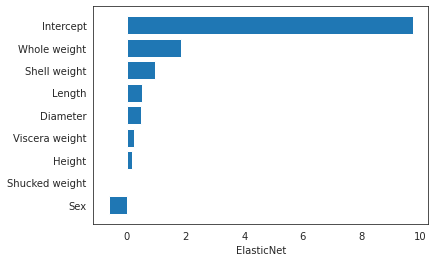

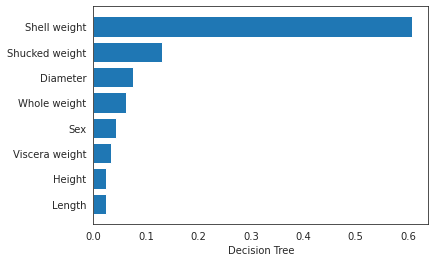

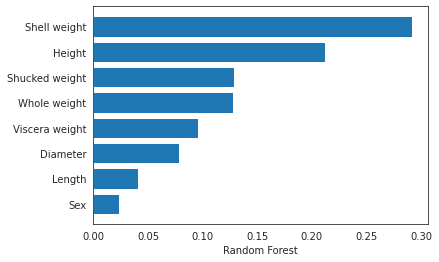

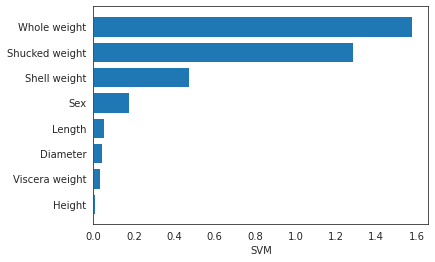

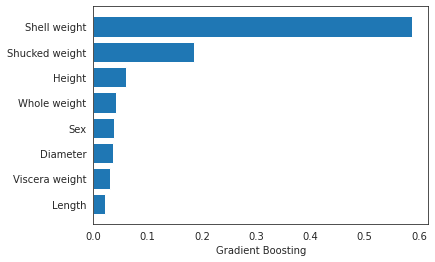

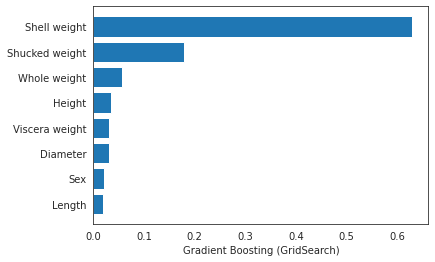

In [ ]:
for el in models:
  plt.figure()
    
  if el == 'ElasticNet':
    features_ = np.array([i[0] for i in coeffs[['Feature']].values])
    values_of_model = coeffs[el].values
    sorted_idx = values_of_model.argsort()
    plt.barh(features_[sorted_idx], values_of_model[sorted_idx])
    plt.xlabel(el)
  else:
    features_ = np.array([i[0] for i in coeffs[['Feature']].values][1::])
    values_of_model = coeffs[el].values[1::]
    sorted_idx = values_of_model.argsort()
    plt.barh(features_[sorted_idx], values_of_model[sorted_idx])
    plt.xlabel(el)
  plt.show( block=False )


The table is very interesting: every model has its own *main* features. First of all, we can see that ElasticNet and Lasso are the same models. It wasn't necessary to train both of them, it was enough to train only one.

**Interpretation of all features of all models:** 
 
**ElasticNet/Lasso:** the most important feature are whole weight, shell weight length and diameter. Other features either have a small weight, or zero weight, or even negative weight. It is quite a logical distribution of coefficients.

**Decision tree:** the most significant features are shell weight and shucked weight. Other features have less coeffcients. It should be mentioned that whole weight has very small coeffcient, while in ElasticNet it is the most important feature. 

**Random Forest:** the most important features are shell weight, height, whole weight and diameter. 

**SVM:** the most omportant features are whole weight, shucked weight and shell weight.

**Gradient Boosting:** the most significant features are shell weight and shicked weight. Other feature don't play a great role.

**Gradient Boosting with GridSearch:** the most important features are shell weight and shicked weight - obviously, like in Gradient Boosting without GridSearch. 


Summing up, we can say that the most important feature, which was discovered in all models, is **shell weight**. Other important features of the models almost do not intersect. For example, Random Forest model has height as an important feature, while other models have small coefficients of this feature. It is also worth mentioning that Gradient Boosting has shucked weight as an important feature and has the best metrics. 

* [1] Calculate performance metrics of all models on the test set. Make relevant comparisons, and explain what model is more appropriate for your problem and what model you would use in the production.

In [ ]:
mean_abs_error = {'Elastic net':mean_absolute_error(y_test, pred_elasticnet),
                  'Decision Tree':mean_absolute_error(y_test, preds_dt),
                  'Random Forest':mean_absolute_error(y_test, preds_rf),
                  'SVM':mean_absolute_error(y_test, preds_svm),
                  'Gradient Boosting':mean_absolute_error(y_test, ypred_gb),
                  'Gradient Boosting with GridSearch':mean_absolute_error(y_test, pred_gbgrid),
                  'Basic NN':mean_absolute_error(ytest, predY),
                  'Basic NN with Stochastic GD':metric(ytest, predY2)}

In [ ]:
mean_abs_error = pd.DataFrame(mean_abs_error.items(), columns=['Model','Mean absolute error'])

In [ ]:
r2_error = {'Elastic net':r2_score(y_test, pred_elasticnet),
                  'Decision Tree':r2_score(y_test, preds_dt),
                  'Random Forest':r2_score(y_test, preds_rf),
                  'SVM':r2_score(y_test, preds_svm),
                  'Gradient Boosting':r2_score(y_test, ypred_gb),
                  'Gradient Boosting with GridSearch':r2_score(y_test, pred_gbgrid),
                  'Basic NN':r2_score(ytest, predY),
                  'Basic NN with Stochastic GB':r2_score(ytest, predY2)}

In [ ]:
r2_error = pd.DataFrame(r2_error.items(), columns=['Model','R2'])

In [ ]:
mean_abs_error

,Model,Mean absolute error
0,Elastic net,1.940600
1,Decision Tree,1.592703
2,Random Forest,1.510929
3,SVM,1.505539
4,Gradient Boosting,1.104466
5,Gradient Boosting with GridSearch,1.465986
6,Basic NN,2.228877
7,Basic NN with Stochastic GD,1.548726


In [ ]:
r2_error

,Model,R2
0,Elastic net,0.307149
1,Decision Tree,0.414171
2,Random Forest,0.556862
3,SVM,0.516778
4,Gradient Boosting,0.775786
5,Gradient Boosting with GridSearch,0.578861
6,Basic NN,0.046248
7,Basic NN with Stochastic GB,0.498974


**Mean absolute error:**

We can see that **Gradient Boosting without GridSearch with default parameters has the best metric** - the smallest mean absolute error of all models. It is obvious because Gradient Boosting has an ensemble architecture. The only strange thing is that Gradient Boosting with GridSearch didn't perform well with comprison to usual Gradient Boosting - maybe default parameters are not included in GridSearch parameters. 

Other models have about the same values of mean absolute error except basic neural network. It performed as the worst model of all models - its mean absolute error is the highest. Of course, it is becase usual Gradient Descent was used there. The second Neural Netwoth with Stochastic Gradient Descent perfomed much better - its mean absolute error is almost like the mean absolute error of other ML models.

R2 helps to understand better what model to use and we can see correlation between R2 metric and Mean Absolute Error. Obviously, Default Gradient Boosting has the best R2 metric. The basic NN has the worst R2 metric. 

Summarizing, based on metrics above, **in production I would use Gradient Boosting**. Maybe I would make it better with other parameters, but definitely it is the best models of all.


# Extra points [2.0]

To get extra points, you will need to implement one of the algorithms:
* [2.0] Gradient boosting: implement both the boosting algorithm and the weak learner (decision tree). Achieve results comparable to the sklearn implementation.
* [2.0] Basic neural networks: fully connected layer, pooling and relu. Your implementation should support both forward and backward passes and show accuracy comparable to a naive PyTorch analogue. Use `numpy` for matrix multiplication and don't forget to check gradients [numerically](https://stats.stackexchange.com/questions/332089/numerical-gradient-checking-best-practices).


Note that you can use [toy datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) if training/testing the custom model takes too long.

For extra points, I decided to choose task 2.

In [ ]:
def squared_error(output, target):
    return 0.5*((target - output)**2)
    
def squared_error_deriv(output, target):
    return -(target-output)

In [ ]:
def activation_relu(value):
    out = 0
    if value > out:
        return value
    return out

def activation_relu_deriv(value):
    out = 0
    if value > out:
        return 1
    return out

In [ ]:
def activation_lrelu(value):
    out = 0
    if value > out:
        return value
    else:
        return value*0.01
    return out

def activation_lrelu_deriv(value):
    out = 0
    if value > out:
        return 1
    else:
        return 0.01
    return out

In [ ]:
def forward_prop(w, x):
    inputs = []   
    net = []         
    outputs = []     
    
    inputs.append(x)
    net.append(w[0]*inputs[0])
    outputs.append(activation_lrelu(net[0]))
    
    inputs.append(outputs[-1])
    net.append(w[1]*inputs[1])
    outputs.append(activation_lrelu(net[1]))
    
    return inputs, net, outputs
        
    
def backprop(weights, inputs, net, outputs, target):
    grad_j = np.ones(len(weights))
    grad_j[1] = squared_error_deriv(outputs[1], target)*activation_lrelu_deriv(net[1])
    grad_j[0] = grad_j[1]*weights[1]*activation_lrelu_deriv(net[0])
    
    for i in range(len(grad_j)):
        grad_j[i] = grad_j[i]*inputs[i]
    return grad_j

In [ ]:
def gradient_descent(weights, grad, learning_rate=0.01):
    for i in range(len(weights)):
        weights[i] = weights[i] - learning_rate*grad[i]
    return weights

In [ ]:
def get_nn_output(w, value):
    return forward_prop(w, value)[-1][-1]

In [ ]:
df = X_train[['Shell weight']]

In [ ]:
df['target'] = y_train

In [ ]:
X = np.array(df['Shell weight'].tolist()) 
Y = np.array(df['target'].tolist()) 

In [ ]:
err_dict_for_viz = {}

np.random.seed(1)
weights = np.random.uniform(size=2)
epochs = 3000


for e in range(1, epochs):
    grad = np.zeros(2)
    
    for ind in range(len(X)):
        i, n, o = forward_prop(weights, X[ind])
        temp = backprop(weights, i, n, o, Y[ind])
        for i in range(2):
            grad[i] += temp[i]
    grad = grad/len(X)
    weights = gradient_descent(weights, grad, 0.000005)

    net_error = 0
    for index in range(len(X)):
        net_error += squared_error(get_nn_output(weights, X[index]), Y[index])
    net_error /= len(X)
    
    if e>8 and e<20:
        err_dict_for_viz["e"+str(e)] = (np.mean(Y)-((net_error*2)**0.5), net_error)
    if e % 500 == 0:
      print("Epoch "+str(e)+" : \t MSE = ", np.around(net_error, decimals=4), "\t \u2207 J = ", np.around(grad, decimals=6))

Epoch 500 : 	 MSE =  70.1778 	 ∇ J =  [-2.185211 -1.275999]
Epoch 1000 : 	 MSE =  70.1617 	 ∇ J =  [-2.194608 -1.292359]
Epoch 1500 : 	 MSE =  70.1454 	 ∇ J =  [-2.204123 -1.308783]
Epoch 2000 : 	 MSE =  70.1289 	 ∇ J =  [-2.213755 -1.325272]
Epoch 2500 : 	 MSE =  70.1121 	 ∇ J =  [-2.223505 -1.341828]


Gradient descent:

In [ ]:
x = []
y = []
label = []

for k, v in err_dict_for_viz.items():
    label.append(k)
    x.append(v[0])
    y.append(v[1])

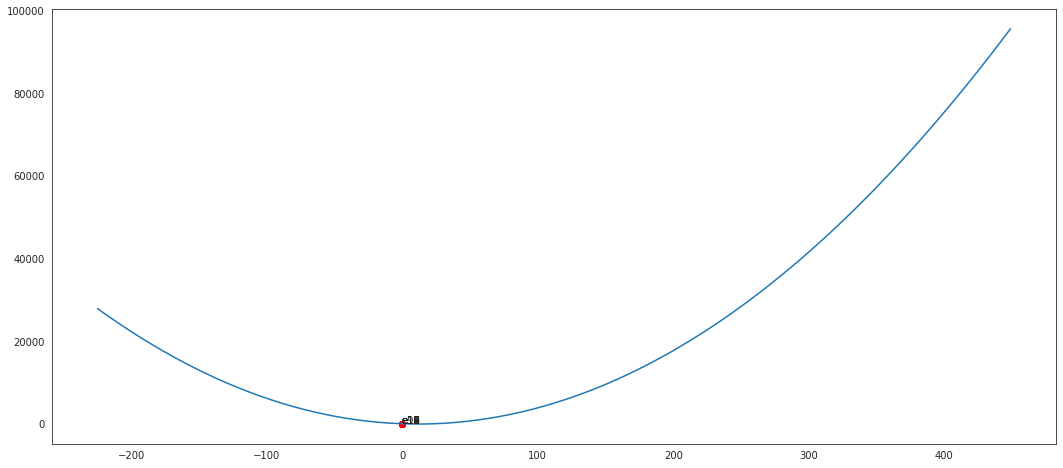

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 8))

x_range = np.arange(-225, 450, 2)
true_value = np.mean(Y)
y_range = []

for i in x_range:
    y_range.append(squared_error(i, true_value))


ax1.plot(x_range, y_range)
ax1.scatter(x, y, color="r")
for i, txt in enumerate(label):
    ax1.annotate(txt, (x[i], y[i]))